<a href="https://colab.research.google.com/github/EndreGuljas/AER850_Project2/blob/main/AER850_Project2_step5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model loaded successfully

Processing crack image...


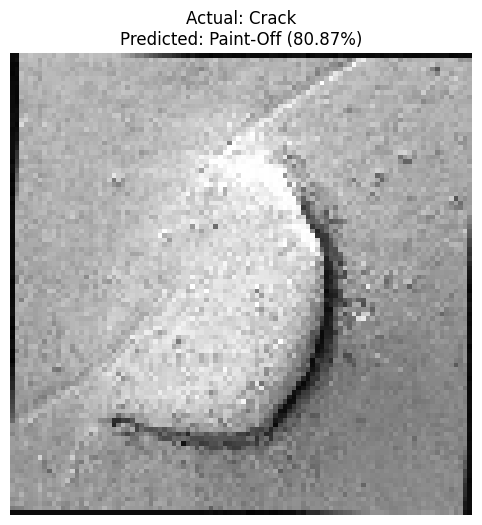

Actual class: crack
Predicted class: paint-off
Confidence: 80.87%

Processing missing_head image...


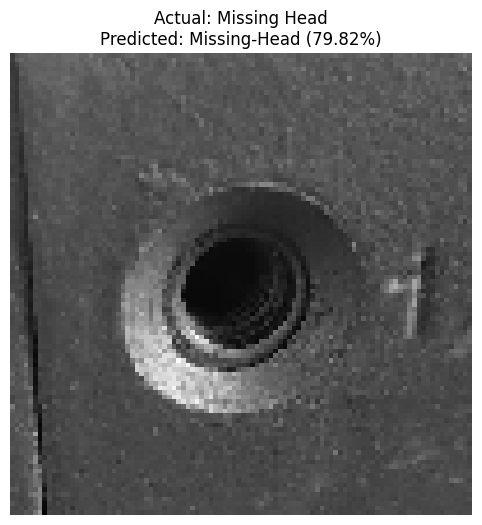

Actual class: missing_head
Predicted class: missing-head
Confidence: 79.82%

Processing paint_off image...


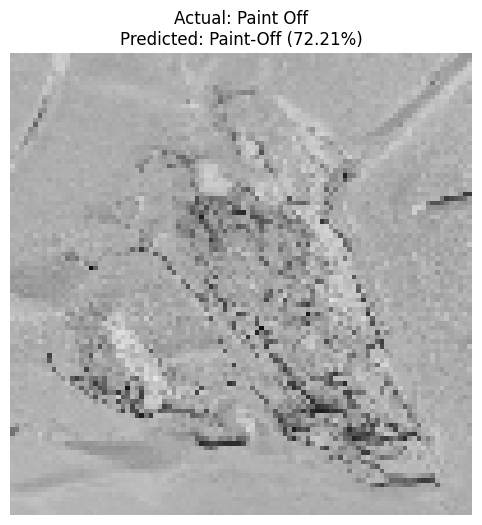

Actual class: paint_off
Predicted class: paint-off
Confidence: 72.21%


In [9]:
'''Step 5: Model Testing'''

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# Loading the previous model
model_path = '/content/drive/MyDrive/AER850_Project2_data/model.keras'
test_model = tf.keras.models.load_model(model_path)
print("Model loaded successfully")

# Defining the path to the test images
test_images = {
    "crack": "/content/drive/MyDrive/AER850_Project2_data/AER850_Project2-main/Project 2 Data/Data/test/crack/test_crack.jpg",
    "missing_head": "/content/drive/MyDrive/AER850_Project2_data/AER850_Project2-main/Project 2 Data/Data/test/missing-head/test_missinghead.jpg",
    "paint_off": "/content/drive/MyDrive/AER850_Project2_data/AER850_Project2-main/Project 2 Data/Data/test/paint-off/test_paintoff.jpg"
}

# Defining the class names based on training
class_names = ["crack", "missing-head", "paint-off"]

def load_and_preprocess_image(image_path):

    # Load and preprocess the image
    img = load_img(image_path, target_size=(100, 100))
    img_array = img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    return img_array, img

def predict_defect(model, image_path):

    # Process the image
    img_array, original_img = load_and_preprocess_image(image_path)

    # Make prediction
    predictions = model.predict(img_array, verbose=0)
    predicted_class = np.argmax(predictions, axis=1)[0]
    confidence = predictions[0][predicted_class]
    predicted_class_name = class_names[predicted_class]

    return predicted_class_name, confidence, original_img


# Processing each test image
for label, image_path in test_images.items():
    print(f"\nProcessing {label} image...")

    # Getting prediction
    predicted_class_name, confidence, img = predict_defect(test_model, image_path)

    # Displaying the image and prediction
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.title(f"Actual: {label.replace('_', ' ').title()}\n"
             f"Predicted: {predicted_class_name.title()} ({confidence*100:.2f}%)")
    plt.axis('off')
    plt.show()

    # Printing the results
    print(f"Actual class: {label}")
    print(f"Predicted class: {predicted_class_name}")
    print(f"Confidence: {confidence*100:.2f}%")